In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

In [307]:
#import files
reg_season_detail = pd.read_csv('RegularSeasonDetailedResults.csv')
tourn_compact = pd.read_csv('TourneyCompactResults.csv')
tourn_detail = pd.read_csv('TourneyDetailedResults.csv')
tourn_seeds = pd.read_csv('TourneySeeds.csv')
seasons = pd.read_csv('Seasons.csv')
teams = pd.read_csv('Teams.csv')

In [308]:
#dataframe of first round results table
first_round = tourn_compact[(tourn_compact['Daynum']==137) | (tourn_compact['Daynum']==136)]

Due to the structure of the raw data, we have to aggregate a team's season data in two tables and then merge them because a team is in a different column depending on if they win or lose (see below for example):

In [309]:
reg_season_detail.head(n=5)

Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Wfgm  Wfga ...   \
0    2003      10   1104      68   1328      62    N      0    27    58 ...    
1    2003      10   1272      70   1393      63    N      0    26    62 ...    
2    2003      11   1266      73   1437      61    N      0    24    58 ...    
3    2003      11   1296      56   1457      50    N      0    18    38 ...    
4    2003      11   1400      77   1208      71    N      0    30    61 ...    

   Lfga3  Lftm  Lfta  Lor  Ldr  Last  Lto  Lstl  Lblk  Lpf  
0     10    16    22   10   22     8   18     9     2   20  
1     24     9    20   20   25     7   12     8     6   16  
2     26    14    23   31   22     9   12     2     5   23  
3     22     8    15   17   20     9   19     4     3   23  
4     16    17    27   21   15    12   10     7     1   14  

[5 rows x 34 columns]

# Create Wins and Loss Tables

However, first we will manipulate the data to find a team's win-loss record for the season if they made the tournament

In [313]:
#calculate total loses per season
loses_season=reg_season_detail[['Season','Lteam']]
loses_season=loses_season.groupby(['Season','Lteam']).size()
loses_season = loses_season.to_frame(name = 'size').reset_index()
loses_season.columns=['Season','Lteam','Total_Loses']
loses_season
#Calculate total wins per season
wins_season=reg_season_detail[['Season','Wteam']]
wins_season=wins_season.groupby(['Season','Wteam']).size()
wins_season = wins_season.to_frame(name = 'size').reset_index()
wins_season.columns=['Season','Wteam','Total_Wins']
wins_season
#combine tables for record per season
win_loss_record = pd.merge(loses_season, wins_season,  how='outer', left_on=['Season','Lteam'], right_on = ['Season','Wteam'])
win_loss_record = pd.merge(win_loss_record, teams, how='inner', left_on='Lteam', right_on='Team_Id')
win_loss_record= pd.merge(win_loss_record,tourn_seeds,how='inner', left_on=['Season','Lteam'], right_on=['Season','Team'])
win_loss_record=win_loss_record[['Season','Lteam','Team_Name','Total_Wins', 'Total_Loses','Seed']]
win_loss_record['Total_Games']=win_loss_record['Total_Wins']+win_loss_record['Total_Loses']


Season         0
Lteam          0
Team_Name      0
Total_Wins     0
Total_Loses    0
Seed           0
Total_Games    0
dtype: int64

# Opp Stats - Losing Teams

The following steps will find the opponents stats for the season against each team - this will be useful for defensive metrics.

In [314]:
#Opp Stats - Losing Teams
Opp_stat_losing_teams=reg_season_detail.groupby(['Season','Lteam']).agg({'Wscore':'sum', 'Wfgm':'sum', 'Wfga':'sum'
                                                            ,'Wfgm3':'sum','Wfga3':'sum','Wftm':'sum',
                                                            'Wftm':'sum','Wfta':'sum','Wor':'sum','Wdr':'sum',
                                                             'Wast':'sum','Wstl':'sum',
                                                            'Wblk':'sum','Wto':'sum',
                                                            'Wpf':'sum'}).reset_index()
Opp_stat_losing_teams.head()

Season  Lteam  Wscore  Wfgm  Wfga  Wfgm3  Wfga3  Wftm  Wfta  Wor  Wdr  \
0    2003   1102     958   312   628     76    178   258   365  142  348   
1    2003   1103    1091   392   759     97    231   210   296  151  334   
2    2003   1104     774   275   576     74    201   150   212  114  245   
3    2003   1105    1528   541  1130    132    334   314   472  251  521   
4    2003   1106    1032   364   793     82    244   222   313  168  371   

   Wast  Wstl  Wblk  Wto  Wpf  
0   164    81    33  193  271  
1   240    89    45  206  280  
2   143    67    46  131  195  
3   324   194    81  335  356  
4   210   133    57  215  216

# Opp Stats - Winning Teams


In [315]:
#Opp Stats - Winning Teams
Opp_stat_winning_teams=reg_season_detail.groupby(['Season','Wteam']).agg({'Lscore':'sum', 'Lfgm':'sum', 'Lfga':'sum'
                                                            ,'Lfgm3':'sum','Lfga3':'sum','Lftm':'sum',
                                                            'Lftm':'sum','Lfta':'sum','Lor':'sum','Ldr':'sum',
                                                             'Last':'sum','Lstl':'sum',
                                                            'Lblk':'sum','Lto':'sum',
                                                            'Lpf':'sum'}).reset_index()
Opp_stat_winning_teams.head()

Season  Wteam  Lscore  Lfgm  Lfga  Lfgm3  Lfga3  Lftm  Lfta  Lor  Ldr  \
0    2003   1102     638   228   560     57    170   125   174  127  216   
1    2003   1103    1019   358   780     83    265   220   302  174  261   
2    2003   1104    1046   376   978    104    335   190   268  191  389   
3    2003   1105     465   161   403     31    122   112   165   92  165   
4    2003   1106     753   244   702     52    182   213   302  149  255   

   Last  Lstl  Lblk  Lto  Lpf  
0    92    71    11  170  243  
1   178    84    32  208  326  
2   184    88    43  257  344  
3    87    50    28  154  140  
4   120   113    32  207  236

In [316]:
#creating table of combined opponent stats
opp_stat1=pd.merge(Opp_stat_winning_teams, win_loss_record,  how='inner', left_on=['Season','Wteam'], right_on = ['Season','Lteam'])
opp_stat_final=pd.merge(opp_stat1, Opp_stat_losing_teams,  how='inner', left_on=['Season','Wteam'], right_on = ['Season','Lteam'])
opp_stat_final.head()

Season  Wteam  Lscore  Lfgm  Lfga  Lfgm3  Lfga3  Lftm  Lfta  Lor ...   \
0    2003   1104    1046   376   978    104    335   190   268  191 ...    
1    2003   1112    1723   653  1621    158    510   259   424  325 ...    
2    2003   1113    1140   411  1005     86    282   232   345  202 ...    
3    2003   1120    1135   415  1104    117    407   188   296  249 ...    
4    2003   1122    1292   468  1138    123    361   233   347  234 ...    

   Wfga3  Wftm  Wfta  Wor  Wdr  Wast  Wstl Wblk  Wto  Wpf  
0    201   150   212  114  245   143    67   46  131  195  
1     49    55    72   42   88    52    21   14   52   60  
2    179   178   250  117  264   178    68   52  154  235  
3    214   144   200  118  253   177    88   30  157  180  
4    113   113   157   81  192   114    52   29   96  117  

[5 rows x 37 columns]

# Opp Stats Aggregate - New Fields

Creating new fields based on the aggregate opponent stats

In [317]:
# total pts and pts per game allowed
opp_stat_final['Tpts_allowed']=opp_stat_final['Wscore']+opp_stat_final['Lscore']
opp_stat_final['Tpts_allowed_game']=opp_stat_final['Tpts_allowed']/opp_stat_final['Total_Games']

#Field goal attempted, made, and percentage allowed
opp_stat_final['Tfga_allowed'] = opp_stat_final['Wfga']+opp_stat_final['Lfga']
opp_stat_final['Tfgm_allowed'] = opp_stat_final['Wfgm']+opp_stat_final['Lfgm']
opp_stat_final['Tfg_perct_allowed']=opp_stat_final['Tfgm_allowed']/opp_stat_final['Tfga_allowed']
opp_stat_final['Tfga_allowed_game']=opp_stat_final['Tfga_allowed']/opp_stat_final['Total_Games']

#3pts attempted, made, and percentage allowed
opp_stat_final['Tfga3_allowed'] = opp_stat_final['Wfga3']+opp_stat_final['Lfga3']
opp_stat_final['Tfgm3_allowed'] = opp_stat_final['Wfgm3']+opp_stat_final['Lfgm3']
opp_stat_final['Tfg3_perct_allowed']=opp_stat_final['Tfgm3_allowed']/opp_stat_final['Tfga3_allowed']
opp_stat_final['T3att_allowed_game']=opp_stat_final['Tfga3_allowed']/opp_stat_final['Total_Games']


#Free throws attempts allowed
opp_stat_final['Tfta_allowed'] = opp_stat_final['Wfta']+opp_stat_final['Lfta']
opp_stat_final['Tfta_allowed_game'] = opp_stat_final['Tfta_allowed'] /opp_stat_final['Total_Games']

#Total off rebounds and off rebounds allowed per game
opp_stat_final['Tor_allowed'] = opp_stat_final['Wor']+opp_stat_final['Lor']
opp_stat_final['Tor_allowed_game']=opp_stat_final['Tor_allowed']/opp_stat_final['Total_Games']

#Total rebounds and rebounds per game allowed
opp_stat_final['Treb_allowed']=opp_stat_final['Wdr']+opp_stat_final['Ldr']+opp_stat_final['Wor']+opp_stat_final['Lor']
opp_stat_final['Treb_allowed_game']=opp_stat_final['Treb_allowed']/opp_stat_final['Total_Games']


#total fouls and fouls per game drawed
opp_stat_final['Tpf_drawed'] = opp_stat_final['Wpf']+opp_stat_final['Lpf']
opp_stat_final['Tpf_drawed_game']=opp_stat_final['Tpf_drawed']/opp_stat_final['Total_Games']

#Total turnovers and turnover (takaways) per game
opp_stat_final['Tto_gained'] = opp_stat_final['Wto']+opp_stat_final['Lto']
opp_stat_final['Tto_gained_game'] = opp_stat_final['Tto_gained']/opp_stat_final['Total_Games']

#Total Posessions allowed
opp_stat_final['Tpos_allowed']=(opp_stat_final['Tfga_allowed']+opp_stat_final['Tto_gained']+opp_stat_final['Tfta_allowed'].apply(lambda x: x*.44)-opp_stat_final['Tor_allowed']).apply(lambda x: x*.96)

#Pos allowed per game
opp_stat_final['Tpos_allowed_game']=opp_stat_final['Tpos_allowed']/opp_stat_final['Total_Games']

#Pts allowed per pos
opp_stat_final['Pts_allowed_per_pos']=opp_stat_final['Tpts_allowed']/opp_stat_final['Tpos_allowed']

#Pts per 100 pos - DRtg
opp_stat_final['Tpts_allowed_per_100']=opp_stat_final['Pts_allowed_per_pos'].apply(lambda x: x*100)
#source: https://www.nbastuffer.com/analytics101/possession/


opp_stat_final.head()


Season  Wteam  Lscore  Lfgm  Lfga  Lfgm3  Lfga3  Lftm  Lfta  Lor  \
0    2003   1104    1046   376   978    104    335   190   268  191   
1    2003   1112    1723   653  1621    158    510   259   424  325   
2    2003   1113    1140   411  1005     86    282   232   345  202   
3    2003   1120    1135   415  1104    117    407   188   296  249   
4    2003   1122    1292   468  1138    123    361   233   347  234   

           ...           Treb_allowed  Treb_allowed_game  Tpf_drawed  \
0          ...                    939          33.535714         539   
1          ...                   1019          36.392857         618   
2          ...                    915          31.551724         663   
3          ...                    985          32.833333         574   
4          ...                    923          34.185185         547   

   Tpf_drawed_game  Tto_gained  Tto_gained_game  Tpos_allowed  \
0        19.250000         388        13.857143     1774.2720   
1        22.071429         472        16.857143     2048.8704   
2        22.862069         450        15.517241     1926.5280   
3        19.133333         474        15.800000     1943.2704   
4        20.259259         378        14.000000     1745.0496   

  Tpos_allowed_game  Pts_allowed_per_pos  Tpts_allowed_per_100  
0         63.366857             1.025773            102.577282  
1         73.173943             0.960041             96.004120  
2         66.432000             1.041251            104.125141  
3         64.775680             1.012211            101.221117  
4         64.631467             1.047535            104.753469  

[5 rows x 61 columns]

Now that there's 61 fields, it's probably most useful to narrow these down to most relevant fields

In [318]:
#FG Att/Gm, 3PT FG Att/Gm, Turnover gain, Off Rebounds allowed, Def Rating, Poessesions allowed per game, fouls against per game, free throws allowed
opp_stat_final=opp_stat_final[['Season','Wteam','Team_Name','Tfga_allowed_game',
'T3att_allowed_game','Tto_gained_game','Tor_allowed_game',
'Tpts_allowed_per_100','Tpos_allowed','Tpos_allowed_game','Tpf_drawed_game',
'Tfta_allowed_game','Total_Wins', 'Total_Loses', 'Seed', 'Total_Games']]

# Winning Team Aggregate Stats

Now create the aggregate stats for the teams itself

In [319]:
#Winning Team Aggregate Stats
wteam_agg=reg_season_detail.groupby(['Season','Wteam']).agg({'Wscore':'sum', 'Wfgm':'sum', 'Wfga':'sum'
                                                            ,'Wfgm3':'sum','Wfga3':'sum','Wftm':'sum',
                                                            'Wftm':'sum','Wfta':'sum','Wor':'sum','Wdr':'sum',
                                                             'Wast':'sum','Wstl':'sum',
                                                            'Wblk':'sum','Wto':'sum',
                                                            'Wpf':'sum'}).reset_index()


# Losing Team Aggregate Stats 

In [320]:
#Losing Team Aggregate Stats
lteam_agg=reg_season_detail.groupby(['Season','Lteam']).agg({'Lscore':'sum', 'Lfgm':'sum', 'Lfga':'sum'
                                                            ,'Lfgm3':'sum','Lfga3':'sum','Lftm':'sum',
                                                            'Lftm':'sum','Lfta':'sum','Lor':'sum','Ldr':'sum',
                                                             'Last':'sum','Lstl':'sum',
                                                            'Lblk':'sum','Lto':'sum',
                                                            'Lpf':'sum'}).reset_index()


In [321]:
#Combined Stats with record
combined_stats = pd.merge(lteam_agg, wteam_agg,  how='outer', left_on=['Season','Lteam'], right_on = ['Season','Wteam'])
combined_stats = pd.merge(combined_stats, win_loss_record, how='inner', on=['Season','Lteam'])


In [322]:
#create new columns
# total pts and pts per game
combined_stats['Tpts']=combined_stats['Wscore']+combined_stats['Lscore']
combined_stats['Tpts_game']=combined_stats['Tpts']/combined_stats['Total_Games']

#Field goal attempted, made, and percentage
combined_stats['Tfga'] = combined_stats['Wfga']+combined_stats['Lfga']
combined_stats['Tfgm'] = combined_stats['Wfgm']+combined_stats['Lfgm']
combined_stats['Tfg_perct']=combined_stats['Tfgm']/combined_stats['Tfga']
combined_stats['Tfga_game']=combined_stats['Tfga']/combined_stats['Total_Games']

#3pts attempted, made, and percentage
combined_stats['Tfga3'] = combined_stats['Wfga3']+combined_stats['Lfga3']
combined_stats['Tfgm3'] = combined_stats['Wfgm3']+combined_stats['Lfgm3']
combined_stats['Tfg3_perct']=combined_stats['Tfgm3']/combined_stats['Tfga3']
combined_stats['Tfga3_game']=combined_stats['Tfga3']/combined_stats['Total_Games']


#Free throws attempted, made, and percentage
combined_stats['Tfta'] = combined_stats['Wfta']+combined_stats['Lfta']
combined_stats['Tftm'] = combined_stats['Wftm']+combined_stats['Lftm']
combined_stats['Tft_perct']=combined_stats['Tftm'] /combined_stats['Tfta'] 
combined_stats['Tfta_att_game'] = combined_stats['Tfta'] /combined_stats['Total_Games']
#Total off rebounds and oof rebounds per game
combined_stats['Tor'] = combined_stats['Wor']+combined_stats['Lor']
combined_stats['Tor_game']=combined_stats['Tor']/combined_stats['Total_Games']

#Total def rebounds and def rebounds per game
combined_stats['Tdr'] = combined_stats['Wdr']+combined_stats['Ldr']
combined_stats['Tdr_game']=combined_stats['Tdr']/combined_stats['Total_Games']

#Total rebounds and rebounds per game
combined_stats['Treb']=combined_stats['Tdr']+combined_stats['Tor']
combined_stats['Treb_game']=combined_stats['Treb']/combined_stats['Total_Games']

#total assists and assists per game
combined_stats['Tast'] = combined_stats['Wast']+combined_stats['Last']
combined_stats['Tast_game']=combined_stats['Tast']/combined_stats['Total_Games']

#total stls and stls per game
combined_stats['Tstl'] = combined_stats['Wstl']+combined_stats['Lstl']
combined_stats['Tstl_game'] = combined_stats['Tstl']/combined_stats['Total_Games']

#total fouls and fouls per game
combined_stats['Tpf'] = combined_stats['Wpf']+combined_stats['Lpf']
combined_stats['Tpf_game']=combined_stats['Tpf']/combined_stats['Total_Games']

#Total turnovers and turnover per game
combined_stats['Tto'] = combined_stats['Wto']+combined_stats['Lto']
combined_stats['Tto_game'] = combined_stats['Tto']/combined_stats['Total_Games']

#Total blocks and blocks per game
combined_stats['Tblk'] = combined_stats['Wblk']+combined_stats['Lblk']
combined_stats['Tblk_game'] = combined_stats['Tblk'] /combined_stats['Total_Games']

#Total Posessions
combined_stats['Tpos']=(combined_stats['Tfga']+ combined_stats['Tto'] + combined_stats['Tfta'].apply(lambda x: x*.44)-combined_stats['Tor']).apply(lambda x: x*.96)

#Pos per game
combined_stats['Tpos_game']=combined_stats['Tpos']/combined_stats['Total_Games']

#points per posession
combined_stats['Pts_per_pos']=combined_stats['Tpts']/combined_stats['Tpos']

#Pts per 100 pos - ORtg
combined_stats['Tpts_per_100']=combined_stats['Pts_per_pos'].apply(lambda x: x*100)

#source: https://www.nbastuffer.com/analytics101/possession/

combined_stats.head()


Season   Lteam  Lscore   Lfgm   Lfga  Lfgm3  Lfga3   Lftm   Lfta    Lor  \
0    2003  1104.0   670.0  234.0  609.0   58.0  202.0  144.0  203.0  150.0   
1    2003  1112.0   231.0   83.0  219.0   20.0   81.0   45.0   68.0   54.0   
2    2003  1113.0   750.0  266.0  643.0   52.0  166.0  166.0  254.0  145.0   
3    2003  1120.0   661.0  250.0  601.0   60.0  202.0  101.0  154.0  126.0   
4    2003  1122.0   433.0  148.0  394.0   49.0  148.0   88.0  126.0   79.0   

       ...         Tpf   Tpf_game    Tto   Tto_game   Tblk  Tblk_game  \
0      ...       505.0  18.035714  372.0  13.285714  106.0   3.785714   
1      ...       497.0  17.750000  414.0  14.785714  118.0   4.214286   
2      ...       563.0  19.413793  406.0  14.000000  123.0   4.241379   
3      ...       491.0  16.366667  477.0  15.900000  149.0   4.966667   
4      ...       504.0  18.666667  411.0  15.222222  126.0   4.666667   

        Tpos  Tpos_game  Pts_per_pos  Tpts_per_100  
0  1776.8064  63.457371     1.091847    109.184658  
1  2051.5200  73.268571     1.163040    116.304009  
2  1913.6640  65.988414     1.151195    115.119478  
3  1939.6608  64.655360     1.084210    108.421019  
4  1742.5152  64.537600     1.080048    108.004797  

[5 rows x 70 columns]

With 70 fields now, I will narrow down to the most relevant

In [323]:
combined_stats=combined_stats[['Season','Wteam','Team_Name','Tpts_game','Tfg_perct','Tfg3_perct',
'Tft_perct','Tfga_game','Tfga3_game','Tfta_att_game','Tdr_game',
'Tor_game','Tstl_game','Tast_game','Tto_game','Tpos','Tpos_game','Pts_per_pos',
'Tpts_per_100']]
combined_stats.head()

Season   Wteam    Team_Name  Tpts_game  Tfg_perct  Tfg3_perct  Tft_perct  \
0    2003  1104.0      Alabama  69.285714   0.420362    0.320144   0.709898   
1    2003  1112.0      Arizona  85.214286   0.461413    0.350534   0.701429   
2    2003  1113.0   Arizona St  75.965517   0.478182    0.317808   0.669737   
3    2003  1120.0       Auburn  70.100000   0.469835    0.344898   0.662162   
4    2003  1122.0  Austin Peay  69.703704   0.452347    0.349138   0.691358   

   Tfga_game  Tfga3_game  Tfta_att_game   Tdr_game   Tor_game  Tstl_game  \
0  57.178571   19.857143      20.928571  23.928571  13.571429   6.607143   
1  65.714286   20.071429      25.000000  27.642857  15.178571   8.464286   
2  56.896552   12.586207      26.206897  23.310345  13.689655   5.206897   
3  54.700000   16.333333      19.733333  22.566667  11.933333   8.033333   
4  52.074074   17.185185      24.000000  24.222222  10.629630   7.037037   

   Tast_game   Tto_game       Tpos  Tpos_game  Pts_per_pos  Tpts_per_100  
0  12.107143  13.285714  1776.8064  63.457371     1.091847    109.184658  
1  17.642857  14.785714  2051.5200  73.268571     1.163040    116.304009  
2  15.551724  14.000000  1913.6640  65.988414     1.151195    115.119478  
3  13.400000  15.900000  1939.6608  64.655360     1.084210    108.421019  
4  13.407407  15.222222  1742.5152  64.537600     1.080048    108.004797

merge with opponent stats to get everything in one dataframe

In [324]:
opp_and_team_stats=pd.merge(opp_stat_final, combined_stats,  how='inner', left_on=['Season','Wteam'], right_on = ['Season','Wteam'])


Season  Wteam  Team_Name_x  Tfga_allowed_game  T3att_allowed_game  \
0    2003   1104      Alabama          55.500000           19.142857   
1    2003   1112      Arizona          64.678571           19.964286   
2    2003   1113   Arizona St          55.655172           15.896552   
3    2003   1120       Auburn          56.633333           20.700000   
4    2003   1122  Austin Peay          56.777778           17.555556   

   Tto_gained_game  Tor_allowed_game  Tpts_allowed_per_100  Tpos_allowed  \
0        13.857143         10.892857            102.577282     1774.2720   
1        16.857143         13.107143             96.004120     2048.8704   
2        15.517241         11.000000            104.125141     1926.5280   
3        15.800000         12.233333            101.221117     1943.2704   
4        14.000000         11.666667            104.753469     1745.0496   

   Tpos_allowed_game      ...       Tfta_att_game   Tdr_game   Tor_game  \
0          63.366857      ...           20.928571  23.928571  13.571429   
1          73.173943      ...           25.000000  27.642857  15.178571   
2          66.432000      ...           26.206897  23.310345  13.689655   
3          64.775680      ...           19.733333  22.566667  11.933333   
4          64.631467      ...           24.000000  24.222222  10.629630   

   Tstl_game  Tast_game   Tto_game       Tpos  Tpos_game  Pts_per_pos  \
0   6.607143  12.107143  13.285714  1776.8064  63.457371     1.091847   
1   8.464286  17.642857  14.785714  2051.5200  73.268571     1.163040   
2   5.206897  15.551724  14.000000  1913.6640  65.988414     1.151195   
3   8.033333  13.400000  15.900000  1939.6608  64.655360     1.084210   
4   7.037037  13.407407  15.222222  1742.5152  64.537600     1.080048   

   Tpts_per_100  
0    109.184658  
1    116.304009  
2    115.119478  
3    108.421019  
4    108.004797  

[5 rows x 33 columns]

In [325]:
opp_and_team_stats.columns

Index(['Season', 'Wteam', 'Team_Name_x', 'Tfga_allowed_game',
       'T3att_allowed_game', 'Tto_gained_game', 'Tor_allowed_game',
       'Tpts_allowed_per_100', 'Tpos_allowed', 'Tpos_allowed_game',
       'Tpf_drawed_game', 'Tfta_allowed_game', 'Total_Wins', 'Total_Loses',
       'Seed', 'Total_Games', 'Team_Name_y', 'Tpts_game', 'Tfg_perct',
       'Tfg3_perct', 'Tft_perct', 'Tfga_game', 'Tfga3_game', 'Tfta_att_game',
       'Tdr_game', 'Tor_game', 'Tstl_game', 'Tast_game', 'Tto_game', 'Tpos',
       'Tpos_game', 'Pts_per_pos', 'Tpts_per_100'],
      dtype='object')

In [327]:
#winning team first round
total_stats_win_first_round=pd.merge(opp_and_team_stats, first_round,  how='inner', left_on=['Season','Wteam'], right_on = ['Season','Wteam'])
total_stats_win_first_round['Win_1st_Round']=1
#losing team first round
total_stats_loss_first_round=pd.merge(opp_and_team_stats, first_round,  how='inner', left_on=['Season','Wteam'], right_on = ['Season','Lteam'])
total_stats_loss_first_round['Win_1st_Round']=0
#concat the two dataframes
frames = [total_stats_win_first_round, total_stats_loss_first_round]
stats_with_results=pd.concat(frames)

In [333]:
#calculate one more stat called 'pace'
stats_with_results['Tot_pos_in_game']=stats_with_results['Tpos_game'] + stats_with_results['Tpos_allowed_game']
stats_with_results['Pace1']=stats_with_results['Tot_pos_in_game'].apply(lambda x: x/80)
stats_with_results['Pace']=stats_with_results['Pace1'].multiply(40)


In [334]:
final_aggregate_data=stats_waith_results[['Season', 'Wteam', 'Team_Name_x', 'Tfga_allowed_game',
       'T3att_allowed_game', 'Tto_gained_game', 'Tor_allowed_game',
       'Tpts_allowed_per_100', 'Tpos_allowed', 'Tpos_allowed_game',
       'Tpf_drawed_game', 'Tfta_allowed_game', 'Total_Wins', 'Total_Loses',
       'Seed', 'Total_Games', 'Tpts_game', 'Tfg_perct',
       'Tfg3_perct', 'Tft_perct', 'Tfga_game', 'Tfga3_game', 'Tfta_att_game',
       'Tdr_game', 'Tor_game', 'Tstl_game', 'Tast_game', 'Tto_game', 'Tpos',
       'Tpos_game', 'Pts_per_pos', 'Tpts_per_100', 'Pace','Win_1st_Round']]


# Visualizations

# Field Goal Percentage

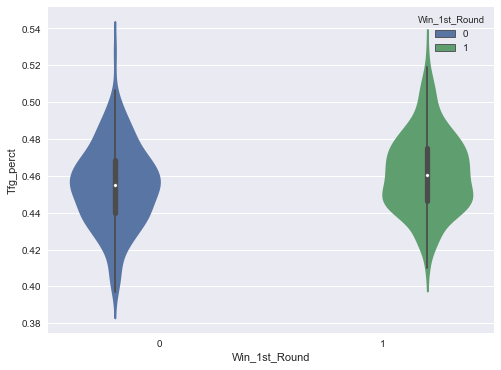

In [371]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tfg_perct", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Field Goal Attempts per Game

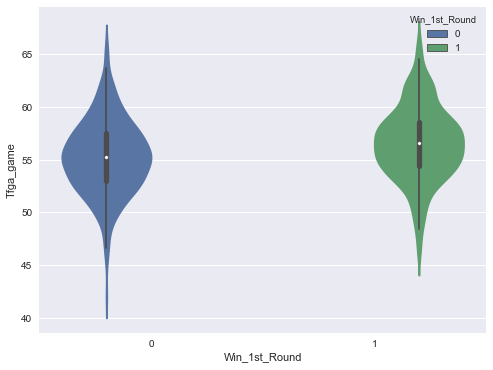

In [372]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tfga_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# 3 PT FG %

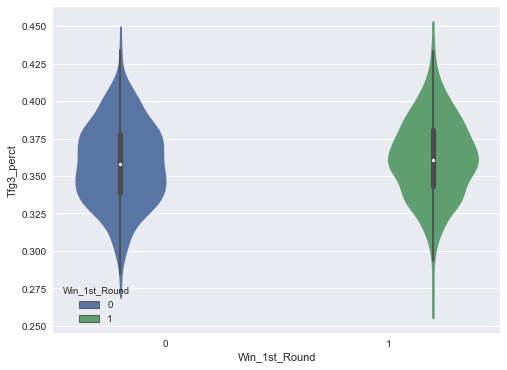

In [373]:
#3P FG % Winning vs Losing teams
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tfg3_perct", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# 3PT Attempts per Game

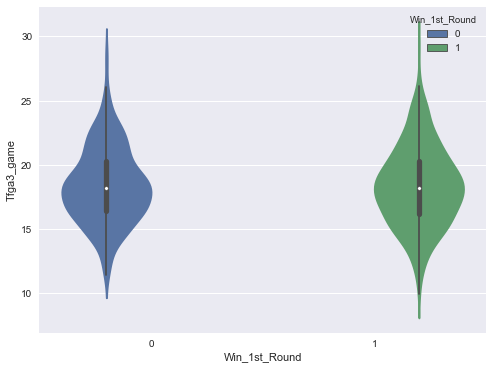

In [374]:
#3P Attempts Winning vs Losing teams
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tfga3_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# FT Percentage

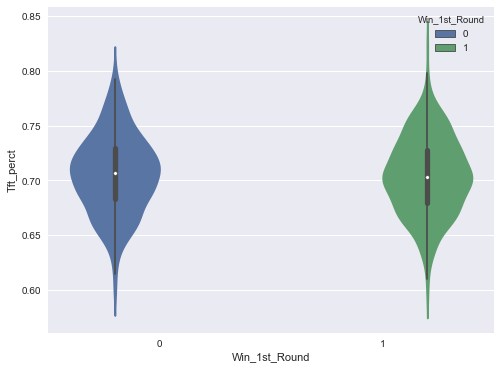

In [375]:
#FT % Winning vs Losing teams

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tft_perct", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# FT Attempts per Game

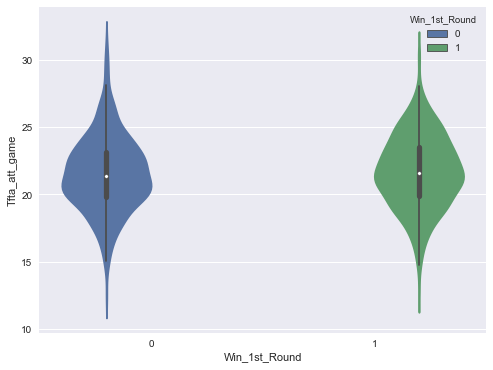

In [376]:
#FTA Winning vs Losing teams

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tfta_att_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Steals per Game

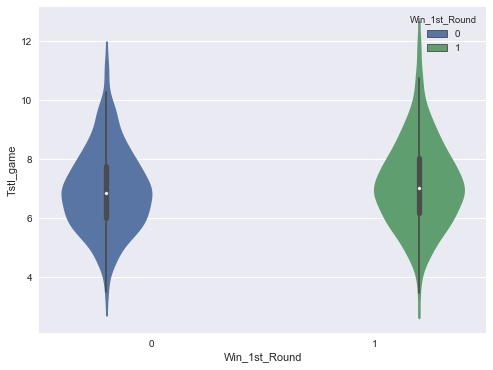

In [377]:
#STLS Winning vs Losing teams

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tstl_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Def Rebounds Per Game

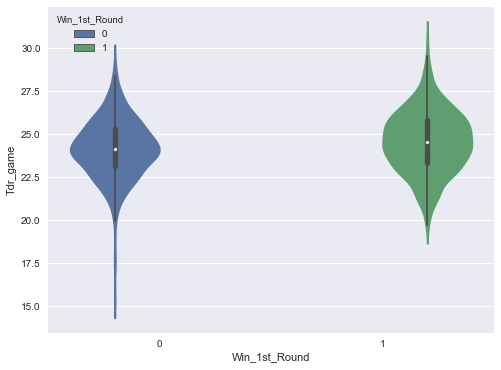

In [378]:
#DRB Winning vs Losing teams

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tdr_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Off Rebounds per Game

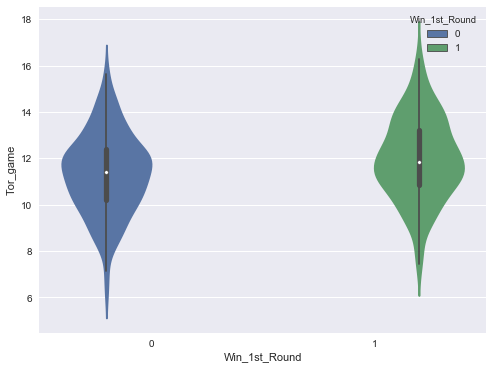

In [379]:
#ORB Winning vs Losing teams

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tor_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Assists per Game

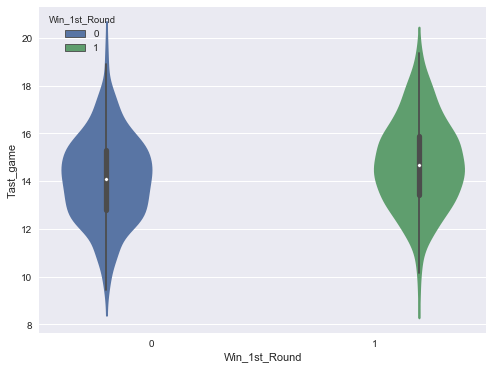

In [381]:
#Ast Winning vs Losing teams

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tast_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Turnovers per Game 

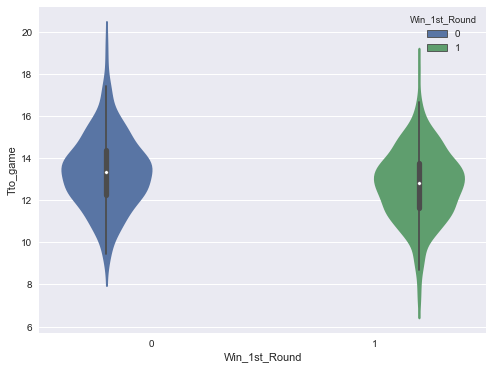

In [382]:
#Turnovers Winning vs Losing teams

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tto_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Off Rebounds Allowed per Game

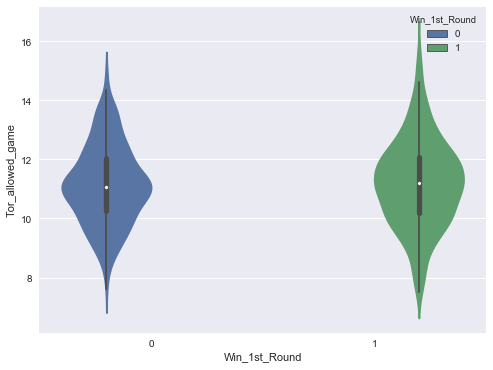

In [394]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tor_allowed_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Total Takeaways per Game

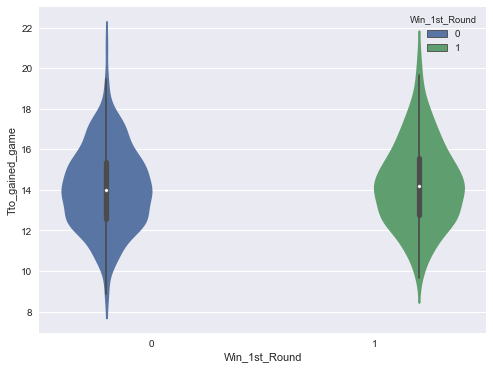

In [390]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Tto_gained_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)


# Pace

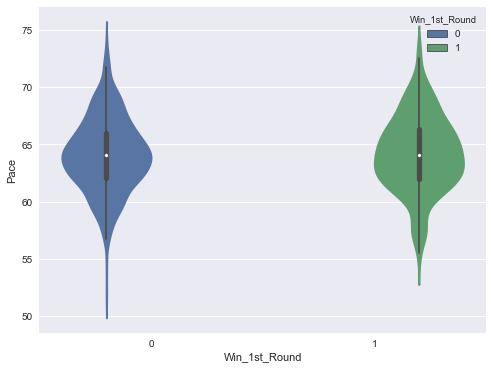

In [383]:
#Pace
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.violinplot(x="Win_1st_Round", y="Pace", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Offensive Rating

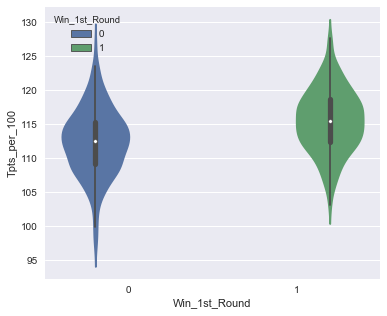

In [386]:
#Pts per 100
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.violinplot(x="Win_1st_Round", y="Tpts_per_100", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Def Rating

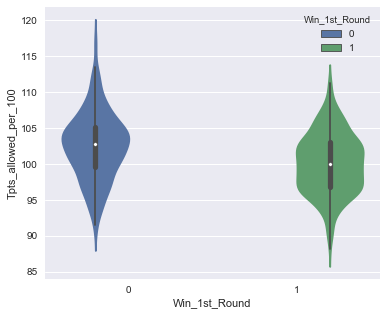

In [388]:
#Pos per game
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.violinplot(x="Win_1st_Round", y="Tpts_allowed_per_100", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Pos per Game

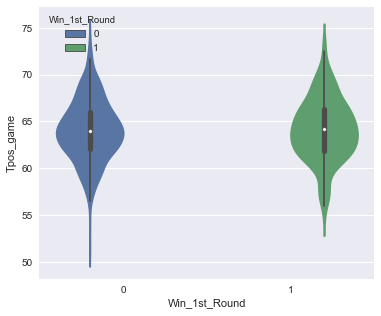

In [387]:
#Pos per game
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.violinplot(x="Win_1st_Round", y="Tpos_game", hue="Win_1st_Round",
 data=final_aggregate_data,ax=ax)

# Winning Percentage by Seed 

In [343]:
final_aggregate_data['Seed_Only'] = final_aggregate_data['Seed'].str.extract('(\d+)', expand=False)
final_aggregate_data['Seed_Only']
wins_by_seed = final_aggregate_data.groupby(['Seed_Only'])['Win_1st_Round'].mean().sort_values(ascending=True)
wins_by_seed.to_frame(name = 'Winning Pct.').reset_index()

/Users/jordantuch/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Seed_Only  Winning Pct.
0         16      0.000000
1         15      0.057692
2         14      0.134615
3         13      0.192308
4         10      0.365385
5         11      0.384615
6         12      0.403846
7         09      0.423077
8         08      0.576923
9         05      0.596154
10        06      0.615385
11        07      0.634615
12        04      0.807692
13        03      0.865385
14        02      0.942308
15        01      1.000000

# FG Percentage Trend

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


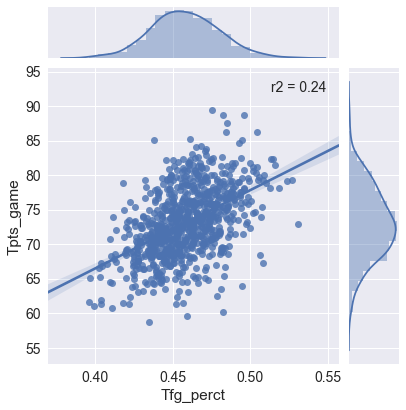

In [439]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x='Tfg_perct', y='Tpts_game', data=final_aggregate_data, kind="reg",  stat_func=r2)
plt.show()

# FT Percentage Trend

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


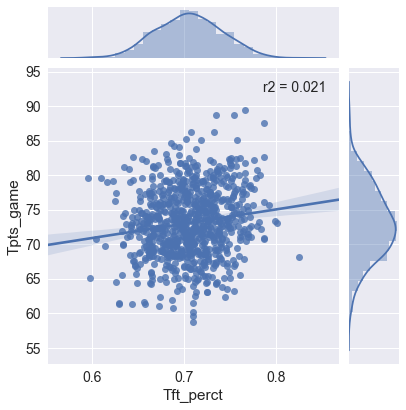

In [441]:
sns.jointplot(x= 'Tft_perct', y='Tpts_game', data=final_aggregate_data,kind="reg",  stat_func=r2)
plt.show()



# 3PT Percentage Trend

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


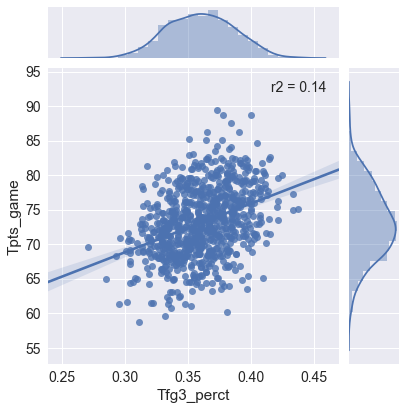

In [442]:
sns.jointplot(x= 'Tfg3_perct', y='Tpts_game', data=final_aggregate_data, kind="reg",  stat_func=r2)
plt.show() 

# Assists per Game Trend

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


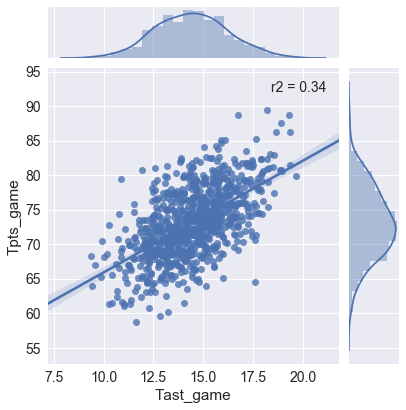

In [443]:
sns.jointplot(x= 'Tast_game', y='Tpts_game', data=final_aggregate_data,kind="reg",  stat_func=r2)
plt.show() 

# 3 Pt Attempts per Game Trend

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


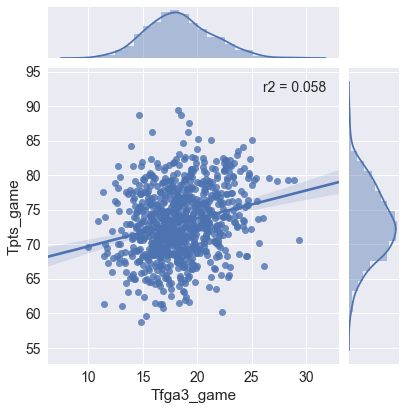

In [444]:
sns.jointplot(x= 'Tfga3_game', y='Tpts_game', data=final_aggregate_data,kind="reg",  stat_func=r2)
plt.show()

# Def Rebounds per Game Trend

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


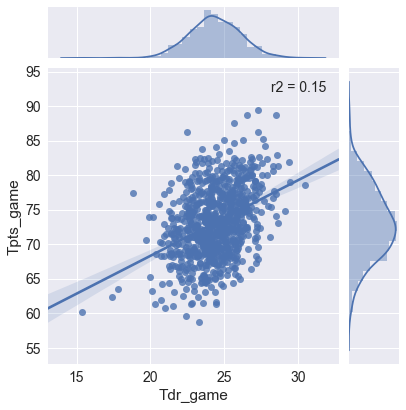

In [445]:
sns.jointplot(x= 'Tdr_game', y='Tpts_game', data=final_aggregate_data,kind="reg",  stat_func=r2)
plt.show()

# Off Rebounds per Game Trend

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


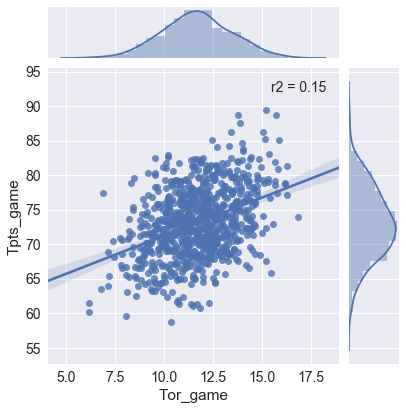

In [446]:
sns.jointplot(x= 'Tor_game', y='Tpts_game', data=final_aggregate_data, kind="reg",  stat_func=r2)
plt.show() 

# Stls per Game vs Pts

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


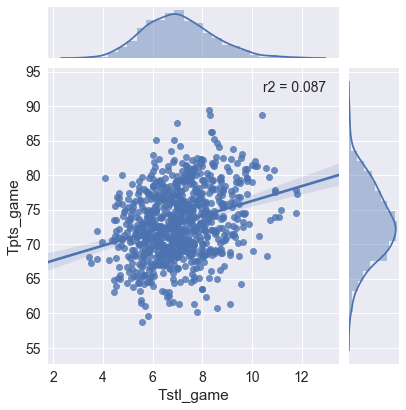

In [448]:
#Stls per game vs  Pts
sns.jointplot(x= 'Tstl_game', y='Tpts_game', data=final_aggregate_data, kind="reg",  stat_func=r2)
plt.show()

# Def Rating vs. vs. Points Scored

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


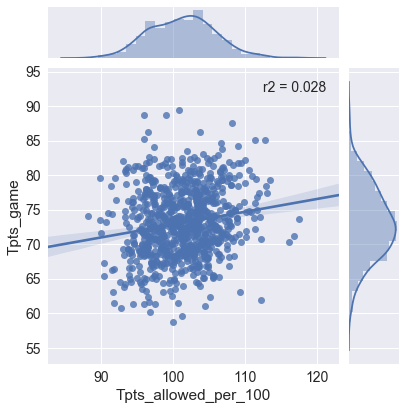

In [452]:
#Def Rating vs  Pts
sns.jointplot(x= 'Tpts_allowed_per_100', y='Tpts_game', data=final_aggregate_data, kind="reg",  stat_func=r2)
plt.show()

# Takeaways vs. Points Scored

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


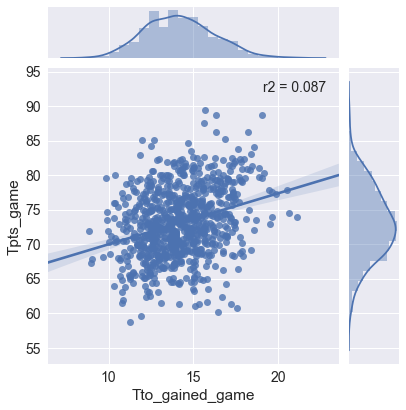

In [451]:
#Take aways vs  Pts
sns.jointplot(x= 'Tto_gained_game', y='Tpts_game', data=final_aggregate_data, kind="reg",  stat_func=r2)
plt.show()

# Pace vs. Points Scored

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


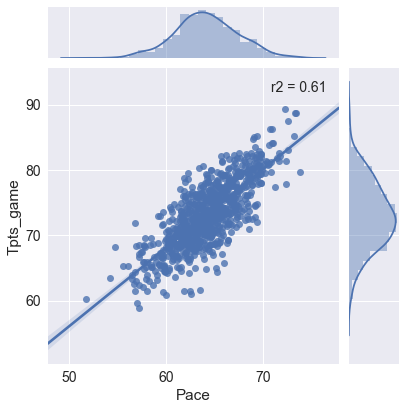

In [450]:
#Pace vs  Pts
sns.jointplot(x= 'Pace', y='Tpts_game', data=final_aggregate_data, kind="reg",  stat_func=r2)
plt.show()

# Off Rebs Allowed vs. Points Scored

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


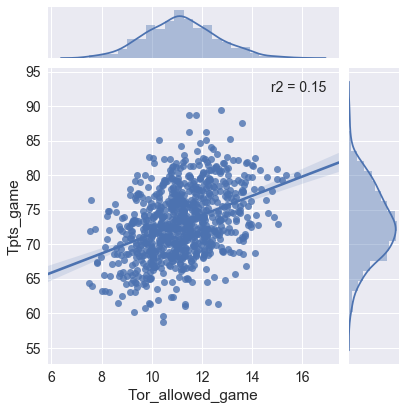

In [449]:
#Off Reb Allowed vs  Pts
sns.jointplot(x= 'Tor_allowed_game', y='Tpts_game', data=final_aggregate_data, kind="reg",  stat_func=r2)
plt.show()

# Correlation table

Total points per posession and offensive rating (points per 100 posession) is the most highly correlated with whether a team wins or not in the first round

Total points is highly correlated with pace and total posessions per game.

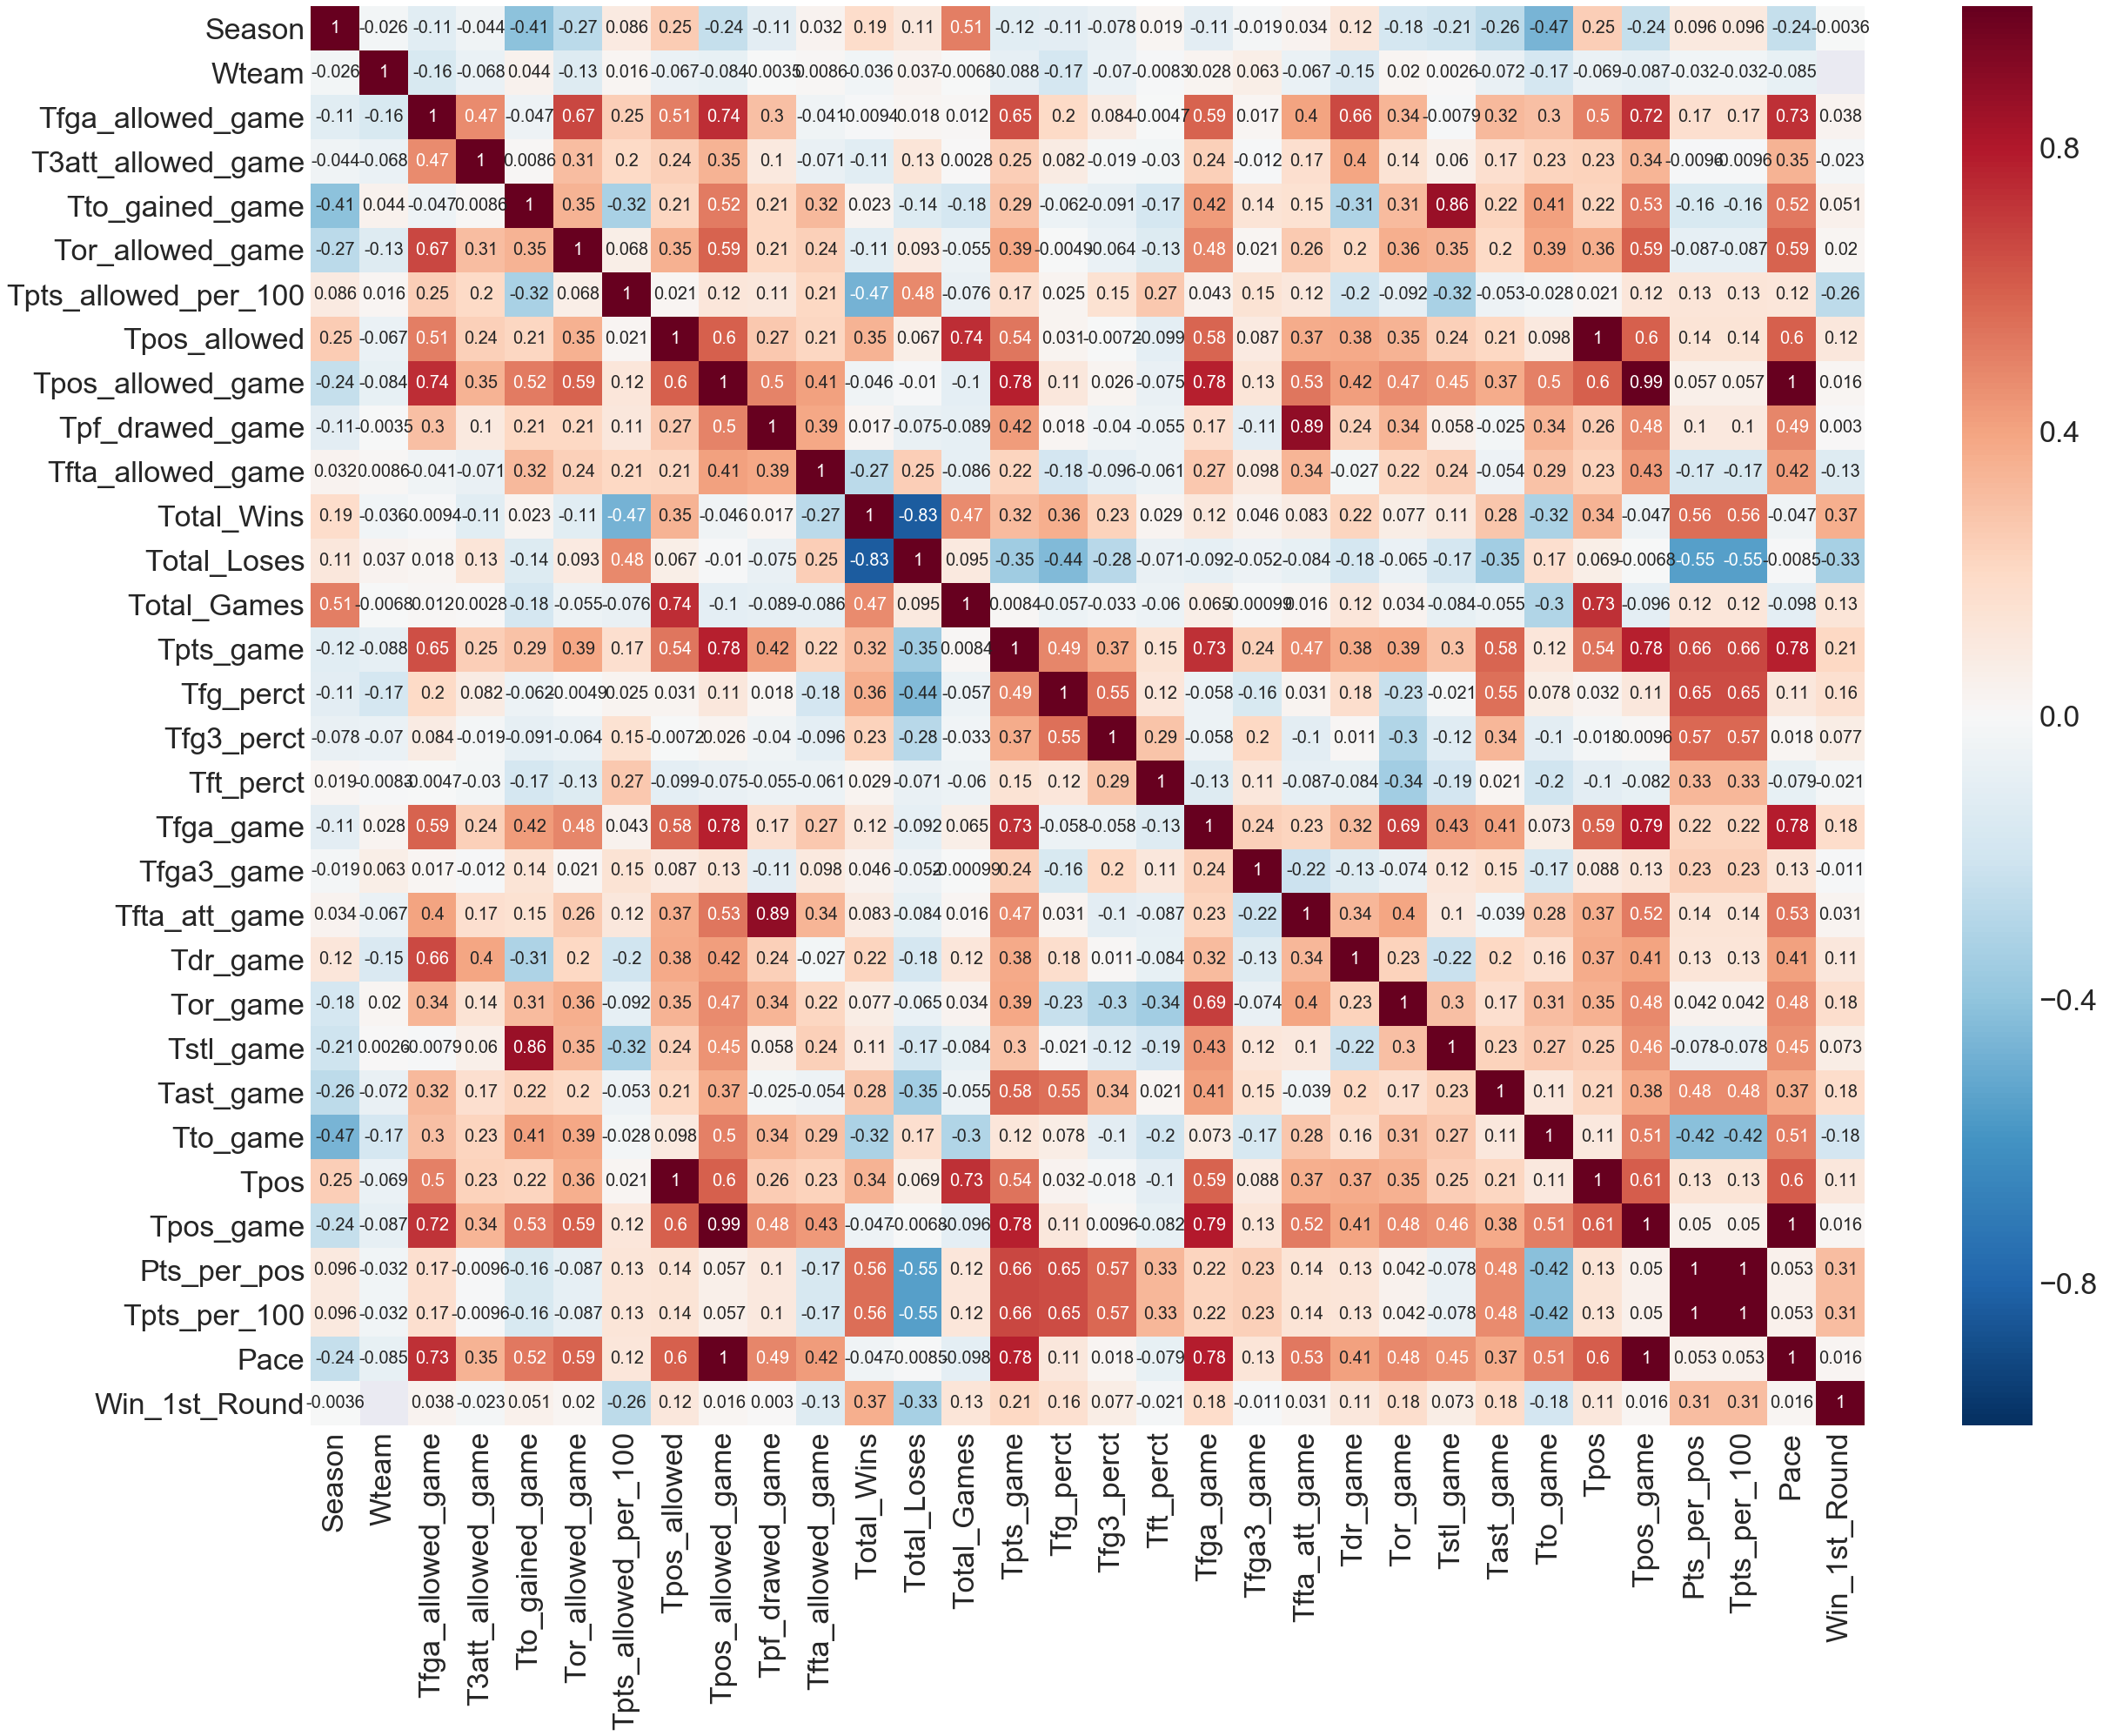

In [430]:
corr_table=final_aggregate_data.corr()
fig, ax = plt.subplots(figsize=(40,30))
sns.heatmap(corr_table, annot=True,annot_kws={"size": 20},ax=ax)